In [13]:
massachusettsCounties = [
    "Barnstable",
    "Berkshire",
    "Bristol",
    "Dukes",
    "Essex",
    "Franklin",
    "Hampden",
    "Hampshire",
    "Middlesex",
    "Nantucket",
    "Norfolk",
    "Plymouth",
    "Suffolk",
    "Worcester"
]

Retrieving data from Mateo

In [14]:
import pandas as pd

Mateo_df1 = pd.read_csv('../Dataset/raw_data/2022_massachusetts_counties_weather_data.csv')
Mateo_df2 = pd.read_csv('../Dataset/raw_data/2023_massachusetts_counties_weather_data.csv')
Mateo_df3 = pd.read_csv('../Dataset/raw_data/2024_massachusetts_counties_weather_data.csv')
Mateo_df = pd.concat([Mateo_df1, Mateo_df2, Mateo_df3])


In [15]:
raw_df = Mateo_df.copy()
for county in massachusettsCounties:
    AQI_df = pd.read_csv(f'../Dataset/raw_data/AQI/{county}_air_pollution_history.csv')
    # check if columns already exist
    if 'aqi' in raw_df.columns:
        raw_df.update(AQI_df.set_index('dt'))
    else:
        raw_df = pd.merge(raw_df, AQI_df, left_on='date', right_on='dt', how='left')

raw_df.head()

,date,county,latitude,longitude,weather_code,temperature_2m_max,temperature_2m_min,sunrise,sunset,daylight_duration,...,dt,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2022-01-01 05:00:00+00:00,Barnstable,41.7003,-70.3002,61.0,51.377,45.437,0,0,33185.110,...,2022-01-01 05:00:00+00:00,1.0,290.39,0.0,3.51,57.22,0.54,2.63,3.16,0.01
1,2022-01-02 05:00:00+00:00,Barnstable,41.7003,-70.3002,53.0,50.117,37.877,0,0,33231.560,...,2022-01-02 05:00:00+00:00,1.0,377.18,0.0,14.91,23.25,1.40,6.24,6.83,0.23
2,2022-01-03 05:00:00+00:00,Barnstable,41.7003,-70.3002,61.0,35.627,28.067,0,0,33282.035,...,2022-01-03 05:00:00+00:00,1.0,310.42,0.0,4.58,54.36,1.48,0.50,0.89,0.24
3,2022-01-04 05:00:00+00:00,Barnstable,41.7003,-70.3002,3.0,29.777,20.957,0,0,33337.040,...,2022-01-04 05:00:00+00:00,2.0,267.03,0.0,0.94,85.83,0.54,0.50,0.84,0.15
4,2022-01-05 05:00:00+00:00,Barnstable,41.7003,-70.3002,63.0,51.557,27.527,0,0,33396.457,...,2022-01-05 05:00:00+00:00,2.0,270.37,0.0,1.93,88.69,0.72,0.71,1.25,0.16


Data Cleaning

In [16]:
filter_columns = ['date', 'county', 'latitude', 'longitude',
                  'temperature_2m_max', 'temperature_2m_min',
                  'uv_index_max', 'wind_speed_10m_max', 'wind_gusts_10m_max','aqi', 'daylight_duration', 'sunshine_duration', 'weather_code']
raw_df_filtered = raw_df[filter_columns]
raw_df_filtered

,date,county,latitude,longitude,temperature_2m_max,temperature_2m_min,uv_index_max,wind_speed_10m_max,wind_gusts_10m_max,aqi,daylight_duration,sunshine_duration,weather_code
0,2022-01-01 05:00:00+00:00,Barnstable,41.7003,-70.3002,51.377000,45.4370,0.55,10.299921,22.146300,1.0,33185.110,0.000,61.0
1,2022-01-02 05:00:00+00:00,Barnstable,41.7003,-70.3002,50.117000,37.8770,0.65,11.872971,25.949202,1.0,33231.560,0.000,53.0
2,2022-01-03 05:00:00+00:00,Barnstable,41.7003,-70.3002,35.627000,28.0670,0.90,18.572489,33.107600,1.0,33282.035,0.000,61.0
3,2022-01-04 05:00:00+00:00,Barnstable,41.7003,-70.3002,29.777000,20.9570,2.50,17.062900,30.199500,2.0,33337.040,29448.775,3.0
4,2022-01-05 05:00:00+00:00,Barnstable,41.7003,-70.3002,51.557000,27.5270,1.40,18.740131,39.147500,2.0,33396.457,7209.592,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14471,2024-10-26 05:00:00+00:00,Worcester,42.4002,-71.9065,58.977500,39.6275,3.90,16.354597,33.778700,2.0,38033.406,33887.590,0.0
14472,2024-10-27 05:00:00+00:00,Worcester,42.4002,-71.9065,50.157500,31.9775,3.80,13.520440,26.620298,NaN,37874.383,33450.656,3.0
14473,2024-10-28 05:00:00+00:00,Worcester,42.4002,-71.9065,48.087500,30.7175,3.05,6.502709,14.987900,NaN,37716.246,32479.160,3.0
14474,2024-10-29 05:00:00+00:00,Worcester,42.4002,-71.9065,50.787500,30.1775,1.80,8.863716,26.844000,NaN,37559.137,9488.694,53.0


In [17]:
raw_df_summary = raw_df_filtered.describe()
raw_df_summary

,latitude,longitude,temperature_2m_max,temperature_2m_min,uv_index_max,wind_speed_10m_max,wind_gusts_10m_max,aqi,daylight_duration,sunshine_duration,weather_code
count,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14252.000000,14476.000000,14476.000000,14476.000000
mean,42.109971,-71.444543,60.885039,44.284160,4.783072,12.148628,24.776753,1.908644,44545.900965,26949.429297,26.629525
std,0.407960,0.938982,17.483539,16.266423,2.218652,4.293209,9.533119,0.735397,7423.863019,15497.776943,27.637686
min,41.283500,-73.182200,1.213699,-19.126300,0.100000,2.916691,5.145100,1.000000,32548.793000,0.000000,0.000000
25%,41.793800,-72.600900,47.009525,32.037800,2.800000,9.083983,17.672300,1.000000,37757.662250,14761.355750,3.000000
50%,42.236950,-71.163100,61.618100,44.537003,4.900000,11.600091,23.712200,2.000000,44921.219000,29982.051000,3.000000
75%,42.400200,-70.752800,75.677000,57.677000,6.850000,14.508199,30.199500,2.000000,51688.878000,39600.000000,53.000000
max,42.633400,-70.099500,99.296600,79.011500,8.200000,44.965927,78.295000,5.000000,55145.312000,50798.797000,95.000000


In [18]:
# check for null values
raw_df_filtered.isnull().sum()

date                    0
county                  0
latitude                0
longitude               0
temperature_2m_max      0
temperature_2m_min      0
uv_index_max            0
wind_speed_10m_max      0
wind_gusts_10m_max      0
aqi                   224
daylight_duration       0
sunshine_duration       0
weather_code            0
dtype: int64

In [19]:
# Outliers

min_values = {
    'uv_index_max': 0.1, 'aqi': 1.0
    }

for col in min_values.keys():
    min = raw_df_summary.loc['min', col]
    q1 = raw_df_summary.loc['25%', col]
    q3 = raw_df_summary.loc['75%', col]
    max = raw_df_summary.loc['max', col]
    IQR = q3-q1

    for i in range(len(raw_df_filtered)):
        val =  raw_df_filtered[col][i]
        if (val<(q1-1.5*IQR )):
            raw_df_filtered.loc[i, col] = min_values[col]
        elif (val>(q3+1.5*IQR )):
            raw_df_filtered.loc[i, col] = (q3+1.5*IQR )

raw_df_filtered.describe()

,latitude,longitude,temperature_2m_max,temperature_2m_min,uv_index_max,wind_speed_10m_max,wind_gusts_10m_max,aqi,daylight_duration,sunshine_duration,weather_code
count,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14476.000000,14252.000000,14476.000000,14476.000000,14476.000000
mean,42.109971,-71.444543,60.885039,44.284160,4.783072,12.148628,24.776753,1.883104,44545.900965,26949.429297,26.629525
std,0.407960,0.938982,17.483539,16.266423,2.218652,4.293209,9.533119,0.657898,7423.863019,15497.776943,27.637686
min,41.283500,-73.182200,1.213699,-19.126300,0.100000,2.916691,5.145100,1.000000,32548.793000,0.000000,0.000000
25%,41.793800,-72.600900,47.009525,32.037800,2.800000,9.083983,17.672300,1.000000,37757.662250,14761.355750,3.000000
50%,42.236950,-71.163100,61.618100,44.537003,4.900000,11.600091,23.712200,2.000000,44921.219000,29982.051000,3.000000
75%,42.400200,-70.752800,75.677000,57.677000,6.850000,14.508199,30.199500,2.000000,51688.878000,39600.000000,53.000000
max,42.633400,-70.099500,99.296600,79.011500,8.200000,44.965927,78.295000,3.500000,55145.312000,50798.797000,95.000000


In [20]:
# Create the weather code mapping dictionary
weather_code_map = {
    0: 'Clear sky',
    1: 'Mainly clear, partly cloudy, and overcast',
    2: 'Mainly clear, partly cloudy, and overcast',
    3: 'Mainly clear, partly cloudy, and overcast',
    45: 'Fog and depositing rime fog',
    48: 'Fog and depositing rime fog',
    51: 'Drizzle: Light, moderate, and dense intensity',
    53: 'Drizzle: Light, moderate, and dense intensity',
    55: 'Drizzle: Light, moderate, and dense intensity',
    56: 'Freezing Drizzle: Light and dense intensity',
    57: 'Freezing Drizzle: Light and dense intensity',
    61: 'Rain: Slight, moderate and heavy intensity',
    63: 'Rain: Slight, moderate and heavy intensity',
    65: 'Rain: Slight, moderate and heavy intensity',
    66: 'Freezing Rain: Light and heavy intensity',
    67: 'Freezing Rain: Light and heavy intensity',
    71: 'Snow fall: Slight, moderate, and heavy intensity',
    73: 'Snow fall: Slight, moderate, and heavy intensity',
    75: 'Snow fall: Slight, moderate, and heavy intensity',
    77: 'Snow grains',
    80: 'Rain showers: Slight, moderate, and violent',
    81: 'Rain showers: Slight, moderate, and violent',
    82: 'Rain showers: Slight, moderate, and violent',
    85: 'Snow showers slight and heavy',
    86: 'Snow showers slight and heavy',
    95: 'Thunderstorm: Slight or moderate',
    96: 'Thunderstorm with slight and heavy hail',
    99: 'Thunderstorm with slight and heavy hail'
}

raw_df_filtered['weather_code'] = raw_df_filtered['weather_code'].map(weather_code_map)
raw_df_filtered.head()


/var/folders/38/3t5791dj1q38h2y0n4r7ncv00000gn/T/ipykernel_15440/2332617246.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered['weather_code'] = raw_df_filtered['weather_code'].map(weather_code_map)


,date,county,latitude,longitude,temperature_2m_max,temperature_2m_min,uv_index_max,wind_speed_10m_max,wind_gusts_10m_max,aqi,daylight_duration,sunshine_duration,weather_code
0,2022-01-01 05:00:00+00:00,Barnstable,41.7003,-70.3002,51.377,45.437,0.55,10.299921,22.146300,1.0,33185.110,0.000,"Rain: Slight, moderate and heavy intensity"
1,2022-01-02 05:00:00+00:00,Barnstable,41.7003,-70.3002,50.117,37.877,0.65,11.872971,25.949202,1.0,33231.560,0.000,"Drizzle: Light, moderate, and dense intensity"
2,2022-01-03 05:00:00+00:00,Barnstable,41.7003,-70.3002,35.627,28.067,0.90,18.572489,33.107600,1.0,33282.035,0.000,"Rain: Slight, moderate and heavy intensity"
3,2022-01-04 05:00:00+00:00,Barnstable,41.7003,-70.3002,29.777,20.957,2.50,17.062900,30.199500,2.0,33337.040,29448.775,"Mainly clear, partly cloudy, and overcast"
4,2022-01-05 05:00:00+00:00,Barnstable,41.7003,-70.3002,51.557,27.527,1.40,18.740131,39.147500,2.0,33396.457,7209.592,"Rain: Slight, moderate and heavy intensity"


In [21]:
# Forward fill missing values for AQI (use the last valid value)
raw_df_filtered['aqi'] = raw_df_filtered['aqi'].fillna(method='ffill')

/var/folders/38/3t5791dj1q38h2y0n4r7ncv00000gn/T/ipykernel_15440/3719437592.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df_filtered['aqi'] = raw_df_filtered['aqi'].fillna(method='ffill')
/var/folders/38/3t5791dj1q38h2y0n4r7ncv00000gn/T/ipykernel_15440/3719437592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered['aqi'] = raw_df_filtered['aqi'].fillna(method='ffill')


In [22]:
import numpy as np
raw_df_filtered['aqi'] = raw_df_filtered['aqi'].replace('Unknown', np.nan)

# Apply forward fill to fill NaN values with the previous valid value
raw_df_filtered['aqi'] = raw_df_filtered['aqi'].fillna(method='ffill')

/var/folders/38/3t5791dj1q38h2y0n4r7ncv00000gn/T/ipykernel_15440/2660332917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered['aqi'] = raw_df_filtered['aqi'].replace('Unknown', np.nan)
/var/folders/38/3t5791dj1q38h2y0n4r7ncv00000gn/T/ipykernel_15440/2660332917.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df_filtered['aqi'] = raw_df_filtered['aqi'].fillna(method='ffill')
/var/folders/38/3t5791dj1q38h2y0n4r7ncv00000gn/T/ipykernel_15440/2660332917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [23]:
#Converting daylight and sunshine duration to hours
raw_df_filtered['daylight_duration'] = raw_df_filtered['daylight_duration'] / 3600
raw_df_filtered['sunshine_duration'] = raw_df_filtered['sunshine_duration'] / 3600

/var/folders/38/3t5791dj1q38h2y0n4r7ncv00000gn/T/ipykernel_15440/2912893217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered['daylight_duration'] = raw_df_filtered['daylight_duration'] / 3600
/var/folders/38/3t5791dj1q38h2y0n4r7ncv00000gn/T/ipykernel_15440/2912893217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered['sunshine_duration'] = raw_df_filtered['sunshine_duration'] / 3600


/Users/triwatana/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/triwatana/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


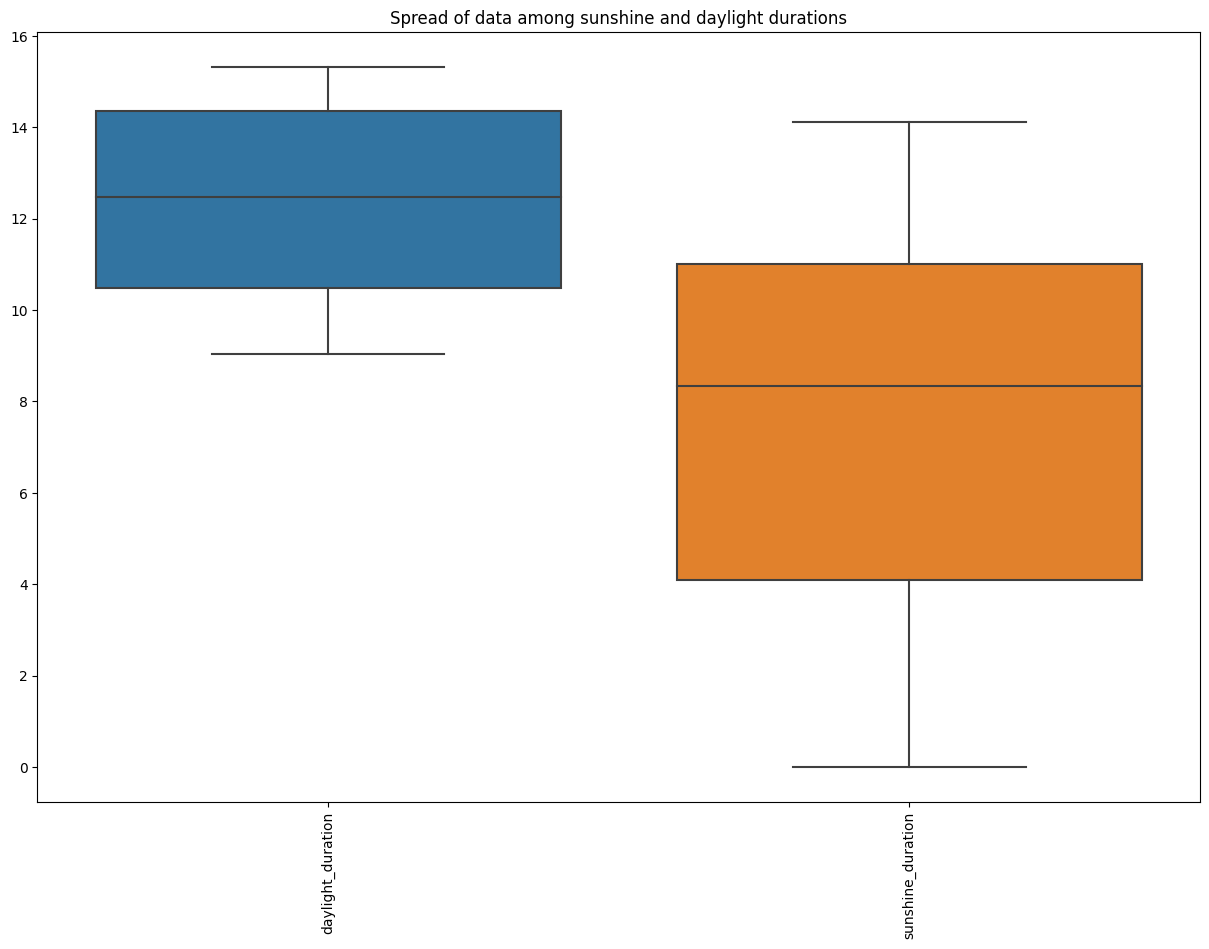

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

group1 = ['daylight_duration', 'sunshine_duration']

plt.figure(figsize=(15,10))
sns.boxplot(data=raw_df_filtered[group1])
plt.xticks(rotation=90)
plt.title('Spread of data among sunshine and daylight durations')
plt.show()

/Users/triwatana/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/triwatana/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


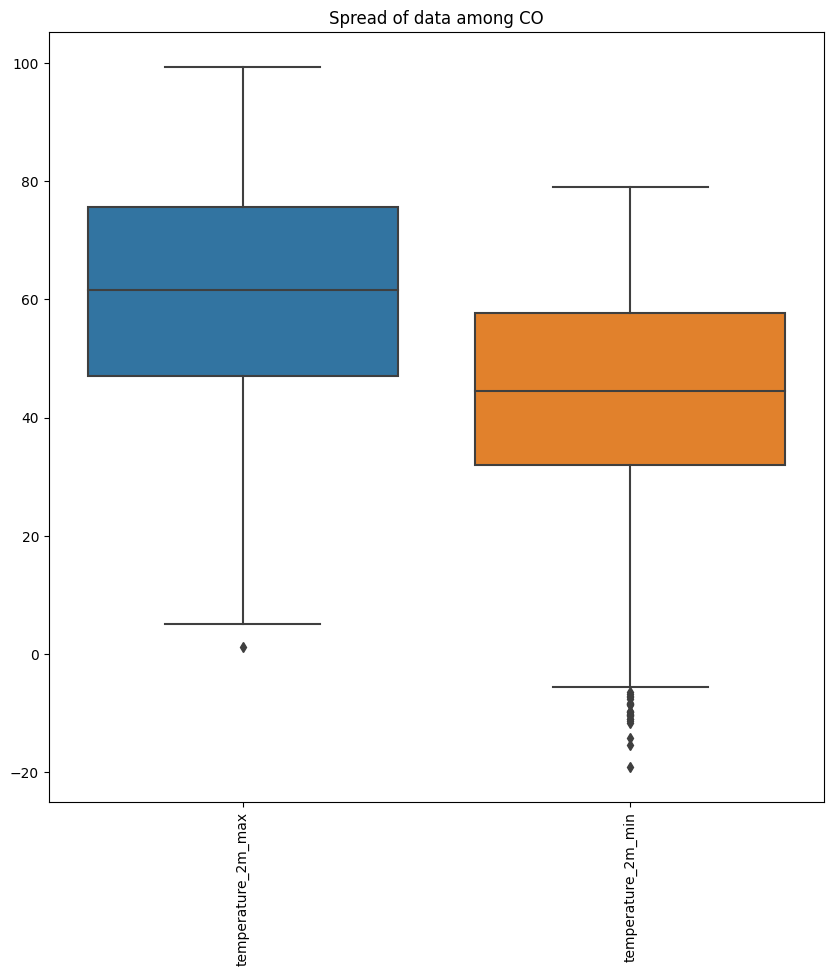

In [25]:
temp = ['temperature_2m_max', 'temperature_2m_min']

plt.figure(figsize=(10,10))
sns.boxplot(data=raw_df_filtered[temp])
plt.xticks(rotation=90)
plt.title('Spread of data among CO')
plt.show()

/Users/triwatana/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/triwatana/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/triwatana/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/triwatana/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

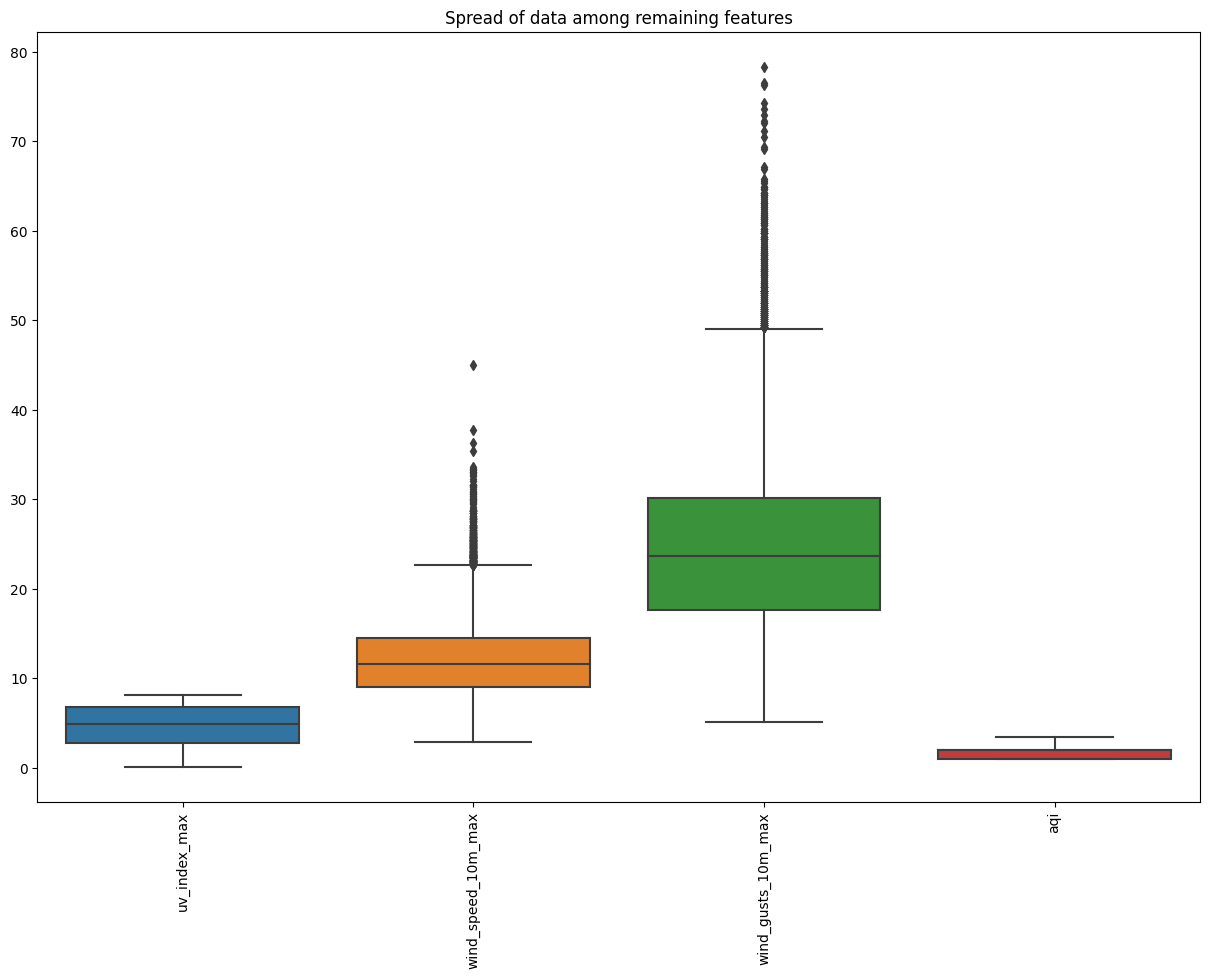

In [26]:
group4 = group1+temp

plt.figure(figsize=(15,10))
sns.boxplot(data=raw_df_filtered.drop(columns=(group4+['weather_code', 'latitude', 'longitude'])))
plt.xticks(rotation=90)
plt.title('Spread of data among remaining features')
plt.show()

In [27]:
# Rename columns for better readability
raw_df_filtered.rename(columns={
    'date': 'Date',
    'county': 'County',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'temperature_2m_max': 'Max Temperature',
    'temperature_2m_min': 'Min Temperature',
    'uv_index_max': 'Max UV Index',
    'wind_speed_10m_max': 'Max Wind Speed',
    'wind_gusts_10m_max': 'Max Wind Gusts',
    'aqi': 'Air Quality Index',
    'daylight_duration': 'Daylight Duration',
    'sunshine_duration': 'Sunshine Duration',
    'weather_code': 'Weather Condition'
}, inplace=True)

raw_df_filtered.head()


/var/folders/38/3t5791dj1q38h2y0n4r7ncv00000gn/T/ipykernel_15440/2604080070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df_filtered.rename(columns={


,Date,County,Latitude,Longitude,Max Temperature,Min Temperature,Max UV Index,Max Wind Speed,Max Wind Gusts,Air Quality Index,Daylight Duration,Sunshine Duration,Weather Condition
0,2022-01-01 05:00:00+00:00,Barnstable,41.7003,-70.3002,51.377,45.437,0.55,10.299921,22.146300,1.0,9.218086,0.000000,"Rain: Slight, moderate and heavy intensity"
1,2022-01-02 05:00:00+00:00,Barnstable,41.7003,-70.3002,50.117,37.877,0.65,11.872971,25.949202,1.0,9.230989,0.000000,"Drizzle: Light, moderate, and dense intensity"
2,2022-01-03 05:00:00+00:00,Barnstable,41.7003,-70.3002,35.627,28.067,0.90,18.572489,33.107600,1.0,9.245010,0.000000,"Rain: Slight, moderate and heavy intensity"
3,2022-01-04 05:00:00+00:00,Barnstable,41.7003,-70.3002,29.777,20.957,2.50,17.062900,30.199500,2.0,9.260289,8.180215,"Mainly clear, partly cloudy, and overcast"
4,2022-01-05 05:00:00+00:00,Barnstable,41.7003,-70.3002,51.557,27.527,1.40,18.740131,39.147500,2.0,9.276794,2.002664,"Rain: Slight, moderate and heavy intensity"


In [28]:
raw_df_filtered.to_csv('../Dataset/cleaned_data/2022_2024_combined_weather_data.csv')